# Text Classification - Vanilla Mixture of Experts (End 2 End, Soft) Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the end to end, soft, MOE model.

## $\color{blue}{Load-Results:}$


In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds'],
      dtype='object')

In [ ]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [ ]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

In [ ]:
df['vanilla_moe_e2e_soft_pseudo_book'] = df['vanilla_moe_e2e_soft_preds'].map(pred2book)

...saving

In [ ]:
# path = 'class/datasets/'
# df.to_pickle(path + 'df_dev')

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book'],
      dtype='object')

## $\color{blue}{Scores:}$


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


In [ ]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['vanilla_moe_e2e_soft_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.6182572614107884

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.5602804993083033
weighted precision: 0.6353247084901685
micro precision: 0.6182572614107884


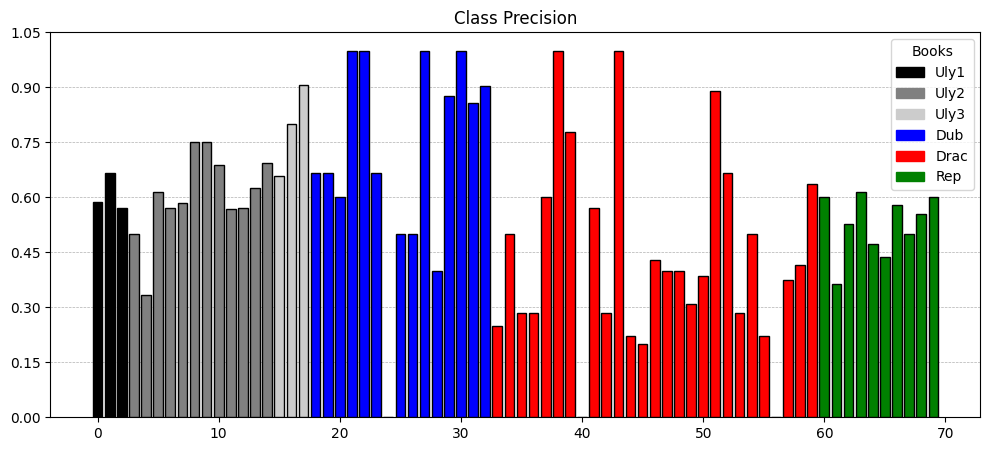

In [ ]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.5419499096930777
weighted recall: 0.6182572614107884
micro recall: 0.6182572614107884


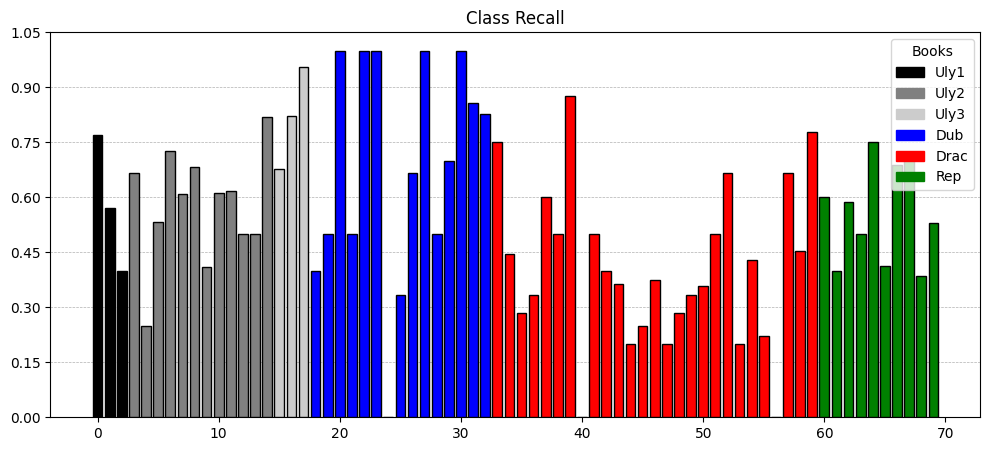

In [ ]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.5367122323669905
weighted f1: 0.6170500977884558
micro f1: 0.6182572614107884


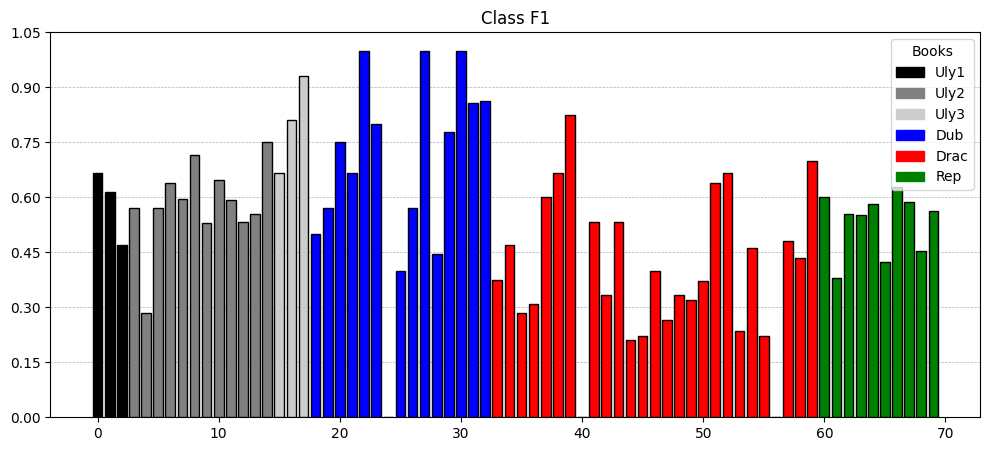

In [ ]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

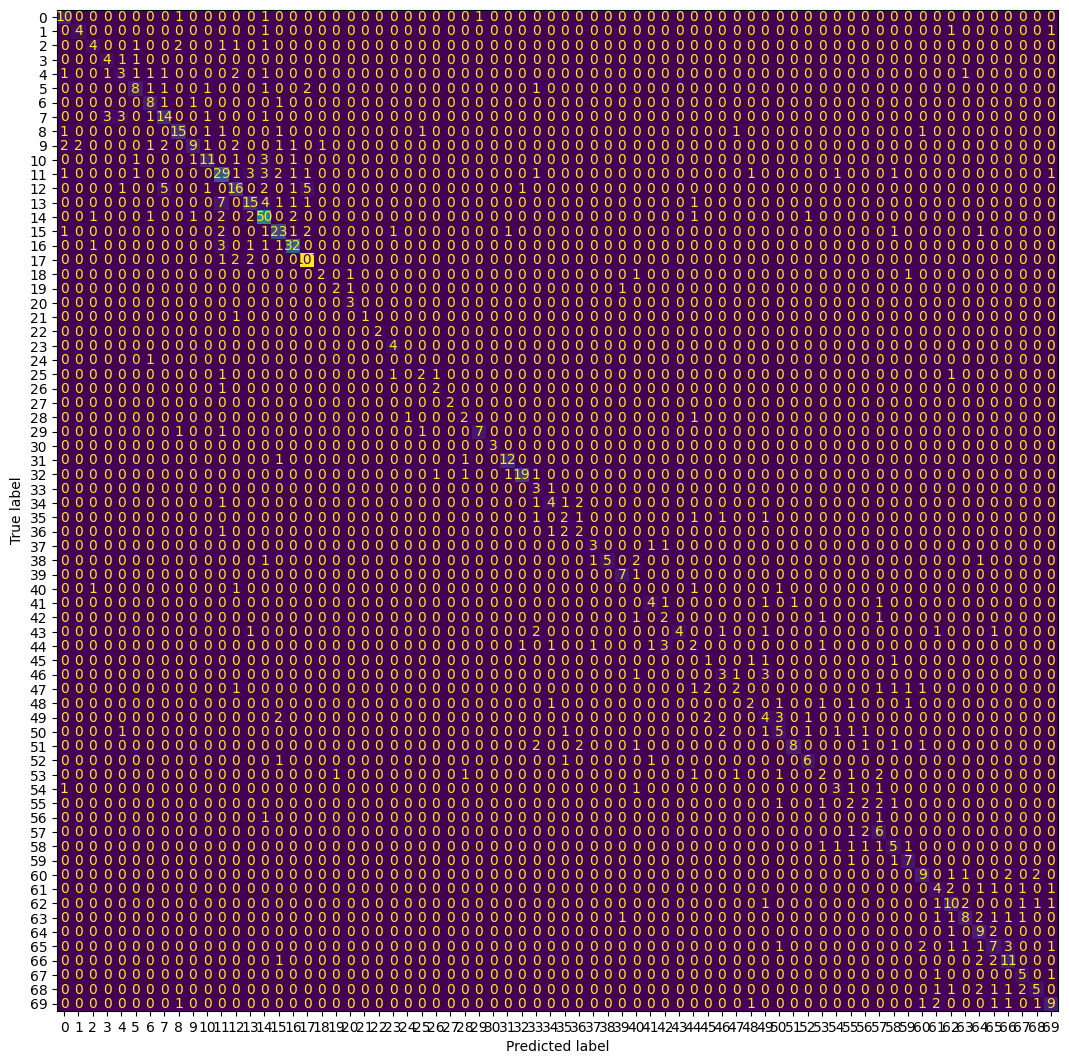

In [ ]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book'],
      dtype='object')

In [ ]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['vanilla_moe_e2e_soft_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.8796680497925311

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.842570399441917
weighted precision: 0.8796524315118134
micro precision: 0.8796680497925311


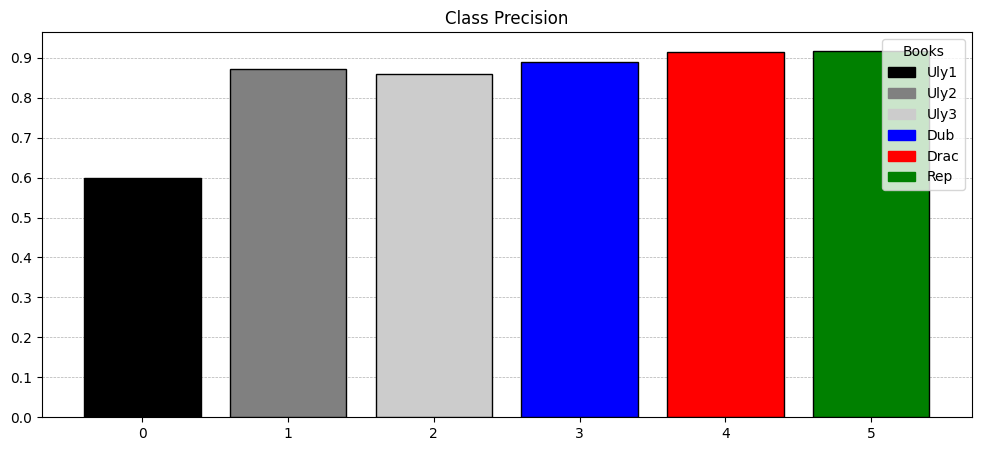

In [ ]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.8431709485836129
weighted recall: 0.8796680497925311
micro recall: 0.8796680497925311


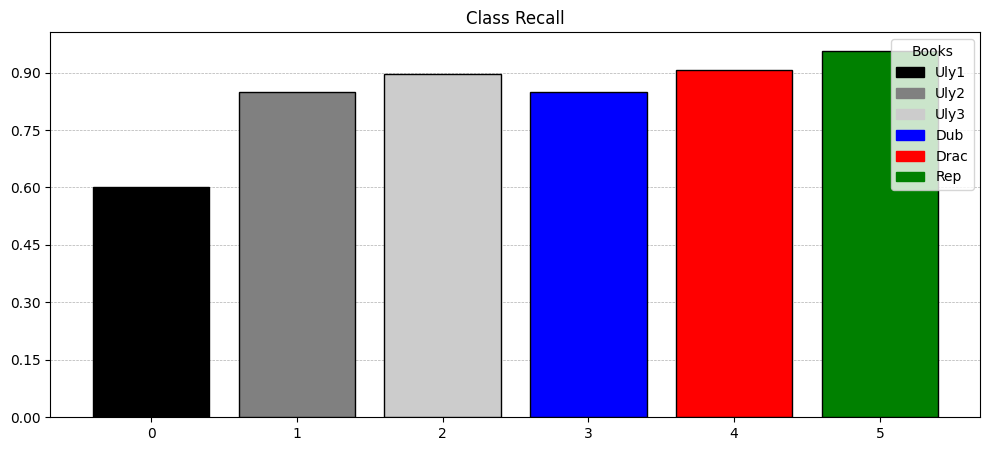

In [ ]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.8426247141525446
weighted f1: 0.8794274487672554
micro f1: 0.8796680497925311


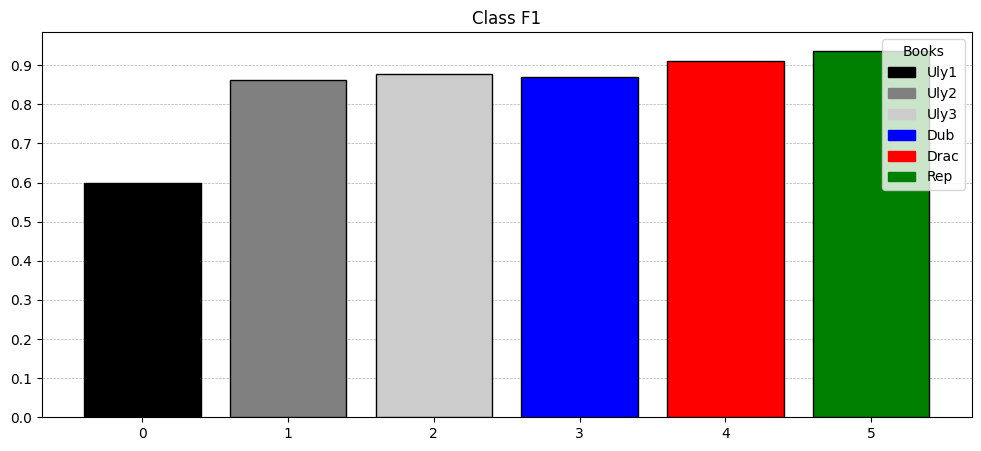

In [ ]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

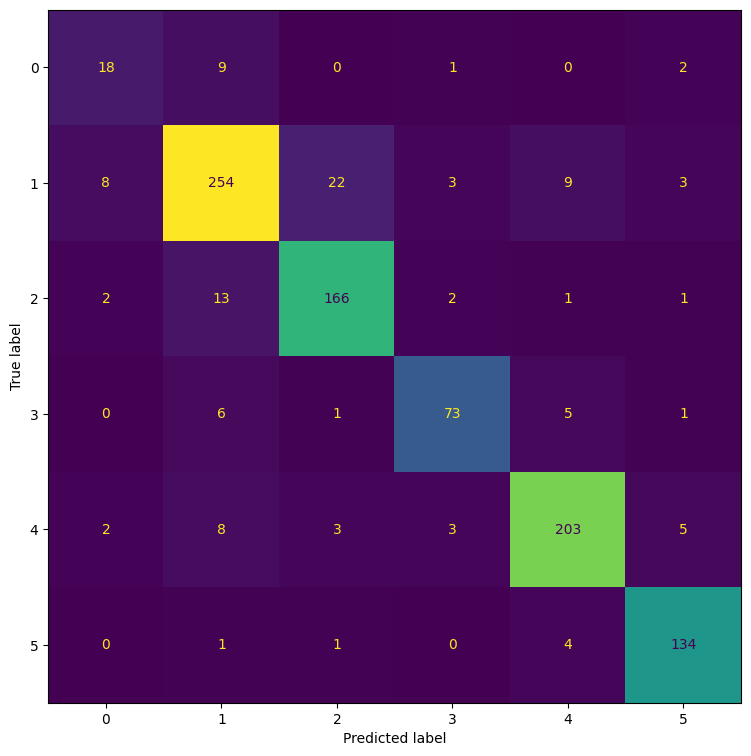

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [ ]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book'],
      dtype='object')

In [ ]:
df_wrong_book = df[df.book_idx != df.vanilla_moe_e2e_soft_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(116, 13)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_preds"]}')


 ------
Book: 5, Chapter: 62
now in the days of his youth, even before he is able to know the reason why; and when reason comes he will recognise and salute the friend with whom his education has made him long familiar.   Yes, he said, I quite agree with you in thinking that our youth should be trained in music and on the grounds which you mention.   Just as in learning to read, I said,
Pred Book: 4, Chapter: 49

 ------
Book: 4, Chapter: 54
Now let me guard yourself. On your forehead I touch this piece of Sacred Wafer in the name of the Father, the Son, and——” There was a fearful scream which almost froze our hearts to hear.
Pred Book: 0, Chapter: 0

 ------
Book: 3, Chapter: 25
I showed him a bit about London when he was over there. He’d open your eye.... I say, Tommy, don’t make punch of that whisky: liquor up.”   “No, really....”   “O, come on, another one won’t do you any harm. What is it?
Pred Book: 1, Chapter: 11

 ------
Book: 4, Chapter: 44
What are we to do for some one who 

<ipython-input-41-8e2998a603e7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [ ]:
df_wrong_chapter = df[df.chapter_idx != df.vanilla_moe_e2e_soft_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(368, 13)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_soft_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_soft_preds"]}')


 ------
Book: 1, Chapter/ 7
—Do you ever see anything of Mrs Beaufoy? Mr Bloom asked.   —Mina Purefoy? she said.   Philip Beaufoy I was thinking. Playgoers’ Club. Matcham often thinks of the masterstroke. Did I pull the chain? Yes. The last act.   —Yes.
Pred Book: 1, Chapter: 10

 ------
Book: 4, Chapter/ 44
This time he had broken out through the window of his room, and was running down the avenue. I called to the attendants to follow me, and ran after him, for I feared he was intent on some mischief. My fear was justified when I saw the same cart which had passed before coming down the road, having on it some great wooden boxes.
Pred Book: 4, Chapter: 41

 ------
Book: 4, Chapter/ 44
When he saw Lucy’s face I could hear the sissing indraw of his breath, and he said to me in a sharp whisper: “Draw up the blind; I want light!” Then he bent down, and, with his face almost touching Lucy’s, examined her carefully. He removed the flowers and lifted the silk handkerchief from her throat.
P

<ipython-input-46-84e172ed2bf6>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [ ]:
D = {
    'model': ["vanilla_moe_e2e_soft"],
    'params': [1308029],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [8]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [ ]:
df_new = pd.DataFrame(D)

In [ ]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [ ]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050


In [ ]:
# path = "class/results/"
# df_res.to_pickle(path + "master_results.pk")

In [5]:
check = pd.read_pickle("class/datasets/df_train") #33 - 59

In [9]:
all = df_res.loc[1]

In [16]:
f1 = all['chapter_recall']

In [17]:
import numpy as mp
np.mean(f1)

0.5419499096930777